In [35]:
import pandas as pd
import time
from scipy import stats
from scipy.stats import zscore
import random
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy

In [4]:
df = pd.read_csv('final.csv',index_col=0)

In [49]:
df.head()

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,...,ssn_dob_homephone_count_1_by_14,ssn_dob_homephone_count_1_by_30,ssn_homephone_name_dob_count_0_by_3,ssn_homephone_name_dob_count_0_by_7,ssn_homephone_name_dob_count_0_by_14,ssn_homephone_name_dob_count_0_by_30,ssn_homephone_name_dob_count_1_by_3,ssn_homephone_name_dob_count_1_by_7,ssn_homephone_name_dob_count_1_by_14,ssn_homephone_name_dob_count_1_by_30
0,1,2016-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,000000-1,1797504115,0,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0
1,2,2016-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0
2,3,2016-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,000000-3,0216537580,0,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0
3,4,2016-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,0132144161,0,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0
4,5,2016-01-01,024065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Columns: 456 entries, record to ssn_homephone_name_dob_count_1_by_30
dtypes: float64(253), int64(171), object(32)
memory usage: 3.4+ GB


In [51]:
df.columns.get_loc('ssn_day_since')

36

In [52]:
# Keep training / test data before 2016-11-01
# Exclude the data before 2016-01-14
df = df.loc[(df['date'] < '2016-11-01') & (df['date'] > '2016-01-14')]

In [53]:
df_prepare = pd.concat([df[['fraud_label']], df.iloc[:,36:]], axis = 1)

In [54]:
df_prepare

,fraud_label,ssn_day_since,ssn_count_0,ssn_count_1,ssn_count_3,ssn_count_7,ssn_count_14,ssn_count_30,address_day_since,address_count_0,...,ssn_dob_homephone_count_1_by_14,ssn_dob_homephone_count_1_by_30,ssn_homephone_name_dob_count_0_by_3,ssn_homephone_name_dob_count_0_by_7,ssn_homephone_name_dob_count_0_by_14,ssn_homephone_name_dob_count_0_by_30,ssn_homephone_name_dob_count_1_by_3,ssn_homephone_name_dob_count_1_by_7,ssn_homephone_name_dob_count_1_by_14,ssn_homephone_name_dob_count_1_by_30
38511,0,365.0,1,1,1,1,1,1,365.0,1,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0
38512,0,365.0,1,1,1,1,1,1,365.0,1,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0
38513,0,365.0,1,1,1,1,1,1,365.0,1,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0
38514,0,365.0,1,1,1,1,1,1,365.0,1,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0
38515,0,365.0,1,1,1,1,1,1,365.0,1,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833502,0,36.0,1,1,1,1,1,1,36.0,1,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0
833503,0,151.0,1,1,1,1,1,1,151.0,1,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0
833504,0,365.0,1,1,1,1,1,1,365.0,1,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0
833505,0,365.0,1,1,1,1,1,1,365.0,1,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0


In [55]:
len(df_prepare)

794996

In [56]:
df_prepare.insert(1,'rand_number',np.random.rand(794996))

In [57]:
df_prepare

,fraud_label,rand_number,ssn_day_since,ssn_count_0,ssn_count_1,ssn_count_3,ssn_count_7,ssn_count_14,ssn_count_30,address_day_since,...,ssn_dob_homephone_count_1_by_14,ssn_dob_homephone_count_1_by_30,ssn_homephone_name_dob_count_0_by_3,ssn_homephone_name_dob_count_0_by_7,ssn_homephone_name_dob_count_0_by_14,ssn_homephone_name_dob_count_0_by_30,ssn_homephone_name_dob_count_1_by_3,ssn_homephone_name_dob_count_1_by_7,ssn_homephone_name_dob_count_1_by_14,ssn_homephone_name_dob_count_1_by_30
38511,0,0.826538,365.0,1,1,1,1,1,1,365.0,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0
38512,0,0.515681,365.0,1,1,1,1,1,1,365.0,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0
38513,0,0.150689,365.0,1,1,1,1,1,1,365.0,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0
38514,0,0.155194,365.0,1,1,1,1,1,1,365.0,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0
38515,0,0.979162,365.0,1,1,1,1,1,1,365.0,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833502,0,0.863745,36.0,1,1,1,1,1,1,36.0,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0
833503,0,0.750075,151.0,1,1,1,1,1,1,151.0,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0
833504,0,0.309853,365.0,1,1,1,1,1,1,365.0,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0
833505,0,0.560643,365.0,1,1,1,1,1,1,365.0,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0


In [59]:
good_record = np.where(df_prepare['fraud_label']==0)
bad_record = np.where(df_prepare['fraud_label']==1)

good = df_prepare.iloc[good_record]
bad = df_prepare.iloc[bad_record]

In [60]:
KSFDR = np.zeros([2, df_prepare.shape[1]])

In [61]:
KSFDR

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [62]:
start_time = pd.datetime.now()

i = 0
for column in df_prepare:
    KSFDR[0][i] = stats.ks_2samp(good[column],bad[column])[0]
    i+1
    
    
print('Duration time', pd.datetime.now()-start_time)

<ipython-input-62-3265e35a93d4>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  start_time = pd.datetime.now()


Duration time 0:00:32.842869


<ipython-input-62-3265e35a93d4>:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  print('Duration time', pd.datetime.now()-start_time)


In [63]:
numbads = df_prepare['fraud_label'].sum()
topRows = int(round(len(df_prepare)*0.03))
print("Top 3% rows",topRows)
print("No of frauds",numbads)


start_time = pd.datetime.now()
j = 0
for column in df_prepare:
    temp = df_prepare.sort_values(column,ascending=False)
    temp1 = temp.head(topRows)
    temp2 = temp.tail(topRows)
    needed1 = temp1.loc[:,'fraud_label']
    needed2 = temp2.loc[:,'fraud_label']
    FDR1 = sum(needed1)/numbads
    FDR2 = sum(needed2)/numbads
    FDRate = np.maximum(FDR1,FDR2)
    KSFDR[1][j] = FDRate
    j = j + 1

print("Duration time", pd.datetime.now()-start_time)  
    
    

Top 3% rows 23850
No of frauds 11486


<ipython-input-63-0f20f1dc3b36>:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  start_time = pd.datetime.now()


Duration time 0:12:50.705841


<ipython-input-63-0f20f1dc3b36>:21: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  print("Duration time", pd.datetime.now()-start_time)


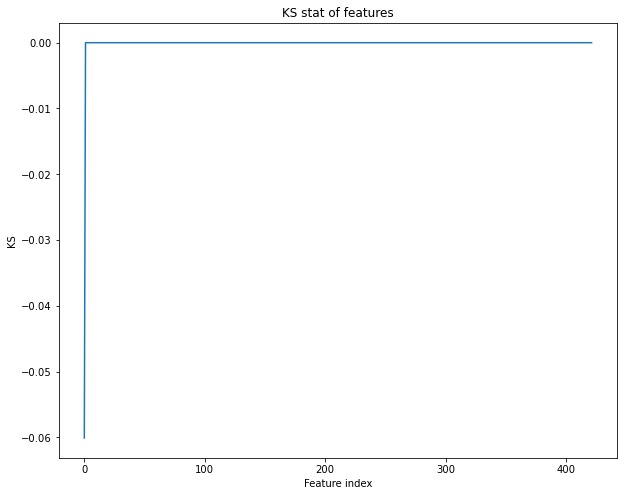

In [64]:
plt.figure(figsize=(10,8))
plt.plot(np.sort(-KSFDR[0][:]))
plt.title("KS stat of features")
plt.ylabel('KS')
plt.xlabel('Feature index')
plt.show()

In [65]:
col_name_red = df_prepare.columns
res_df_prof = pd.DataFrame.from_dict({'KS':KSFDR[0][:],'FDR':KSFDR[1][:]},orient='index',
                       columns=col_name_red)

In [66]:
res_df_prof = res_df_prof.transpose()
res_df_prof['Avg'] = res_df_prof.mean(axis = 1)
res_df_prof['KS Rank'] = res_df_prof['KS'].rank(ascending = False)
res_df_prof['FDR Rank'] = res_df_prof['FDR'].rank(ascending=False)
res_df_prof['Average Rank'] = res_df_prof[['KS Rank','FDR Rank']].mean(axis = 1)
res_df_prof_filter = res_df_prof.sort_values(by='Average Rank',ascending=True)
# res_df_filter = res_df_filter.drop(columns='rank_avg')
res_df_prof_filter

,KS,FDR,Avg,KS Rank,FDR Rank,Average Rank
fraud_label,0.060099,1.000000,0.530049,1.0,1.0,1.0
fulladdress_day_since,0.000000,0.358349,0.179175,212.0,2.0,107.0
address_day_since,0.000000,0.355302,0.177651,212.0,3.0,107.5
fulladdress_count_30,0.000000,0.354954,0.177477,212.0,4.0,108.0
address_count_30,0.000000,0.353300,0.176650,212.0,5.0,108.5
...,...,...,...,...,...,...
ssn_homephone_count_0,0.000000,0.034738,0.017369,212.0,417.0,314.5
ssn_homephone_name_dob_count_0,0.000000,0.034651,0.017325,212.0,420.0,316.0
ssn_fulladdress_homephone_count_0,0.000000,0.034651,0.017325,212.0,420.0,316.0
ssn_name_homephone_count_0,0.000000,0.034651,0.017325,212.0,420.0,316.0
